### Notebook para analizar los resultados obtenidos de la simulación de Ising

In [124]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

import numpy as np
import pandas as pd
import csv

## Magnetización a lo largo de la evolución

### Lo usamos para verificar que el sistema ha termalizado correctamente

global T_range
T_step = 0.1 # Paso entre cada temperatura para la que se va a ejecutar
T_fine_step = 0.01 # Paso más fino para temperaturas cercanas a la crítica

T_range = np.concatenate((
    np.arange(4.0, 2.4, -T_step),
    np.arange(2.4, 2.0, -T_fine_step),
    np.arange(2.4, 0.0, -T_step)
))

L = 10


for T in  T_range:
    T = round(T, 3)
    M = 500 # Número de medidas a realizar
    M0 = 100 # Número de pasos Monte Carlo hasta termalizar
    mc = 5 # Número de pasos Monte Carlo entre cada medida
    
    if T > 2.0 and T < 2.4: M0 = 500 # Más pasos de termalización cerca de T_c
    df = pd.read_csv(f'./Resultados/rm0_{L}_{T}_{M0}_{M}_{mc}.csv', header= None)
    data = df.to_numpy()[0]
    M = len(data)
    
    fig, ax = plt.subplots()
    ax.set_title(f"T = {T}")
    ax.set_ylim(-0.1, 1.1)
    ax.scatter(range(M), data, marker='.')


## Estados finales del sistema

for T in  T_range:
    T = round(T, 2)
    df = pd.read_csv(f'./Resultados/sfina_{L}_{T}_{M0}_{M}_{mc}.csv', header= None)
    data = df.to_numpy()[0]
    N = len(data)
    L = int(np.sqrt(N))
    
    
    fig, ax = plt.subplots()
    ax.set_title(f"T = {T}")
    ax.imshow(np.reshape(data, (L,L)), cmap='binary_r')
    # cmap = 'binary_r': negro = +1, blanco = -1
    

## Medidas generales

In [125]:
df = pd.read_csv(f'./Resultados/medidas.csv')
df = df.sort_values(by=['L', 'T', 'M', 'M0'], ascending=[True, False, True, True])
df.describe()

,T,L,M,M0,mc,rm,rm2,rm4,error,mc*tau,c
count,2841.000000,2841.000000,2841.000000,2841.000000,2841.000000,2841.000000,2841.000000,2.841000e+03,2841.000000,2841.000000,2841.000000
mean,2.243690,31.154523,3856.001408,2607.039775,2.087997,0.584500,0.486086,4.010019e-01,0.003190,0.217024,0.111274
std,0.915405,32.714154,4976.888847,3547.239514,1.913260,0.356995,0.384601,3.873885e-01,0.004130,0.339639,0.117346
min,0.100000,10.000000,100.000000,100.000000,1.000000,0.010515,0.000174,9.053374e-08,0.000000,-0.001961,-0.001965
25%,1.900000,10.000000,500.000000,100.000000,1.000000,0.195840,0.058114,8.892182e-03,0.000549,0.000590,0.000301
50%,2.300000,20.000000,1000.000000,500.000000,1.000000,0.687422,0.513161,3.146888e-01,0.002004,0.114090,0.063694
75%,2.800000,40.000000,8000.000000,4000.000000,5.000000,0.938010,0.880623,7.765071e-01,0.004099,0.320113,0.218203
max,4.000000,160.000000,20000.000000,11000.000000,10.000000,1.000000,1.000000,1.000000e+00,0.041978,3.622678,0.420134


In [126]:
# Cargamos los datos del dataframe en arrays
L_list = df['L'].unique()
# L_list = [10, 20, 30, 40, 60, 80, ]
L_list = L_list[:]
n = len(L_list)
# m = 44

def select_unique_rows(group):
    return group.drop_duplicates(subset=['T'], keep='last')

# Aplicar la función a cada grupo de 'L'
unique_rows = df.groupby('L', group_keys=False).apply(select_unique_rows)
m = len(unique_rows)

T_array = np.zeros((n, m))

rm_array =  np.zeros((n, m))
rm2_array = np.zeros((n, m))
rm4_array = np.zeros((n, m))

mctau_array = np.zeros((n, m))
error_array = np.zeros((n, m))
c_array = np.zeros((n, m))

for i, L in enumerate(L_list):

    
    T_array[i, :]    [:len(unique_rows[unique_rows['L']==L]['T'])] = unique_rows[unique_rows['L']==L]['T']
    rm_array[i, :]   [:len(unique_rows[unique_rows['L']==L]['rm'])] = unique_rows[unique_rows['L']==L]['rm']
    rm2_array[i, :]  [:len(unique_rows[unique_rows['L']==L]['rm2'])] = unique_rows[unique_rows['L']==L]['rm2']
    rm4_array[i, :]  [:len(unique_rows[unique_rows['L']==L]['rm4'])] = unique_rows[unique_rows['L']==L]['rm4']
    mctau_array[i, :][:len(unique_rows[unique_rows['L']==L]['mc*tau'])] = unique_rows[unique_rows['L']==L]['mc*tau']
    error_array[i, :][:len(unique_rows[unique_rows['L']==L]['error'])] = unique_rows[unique_rows['L']==L]['error']
    c_array[i, :]    [:len(unique_rows[unique_rows['L']==L]['c'])] = unique_rows[unique_rows['L']==L]['c']


### Diapositiva [45] - COMPLETADO

Faltaría dibujar la curva teórica y la línea vertical con la Tc

C:\Windows\Temp\ipykernel_14140\2479529756.py:13: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show();


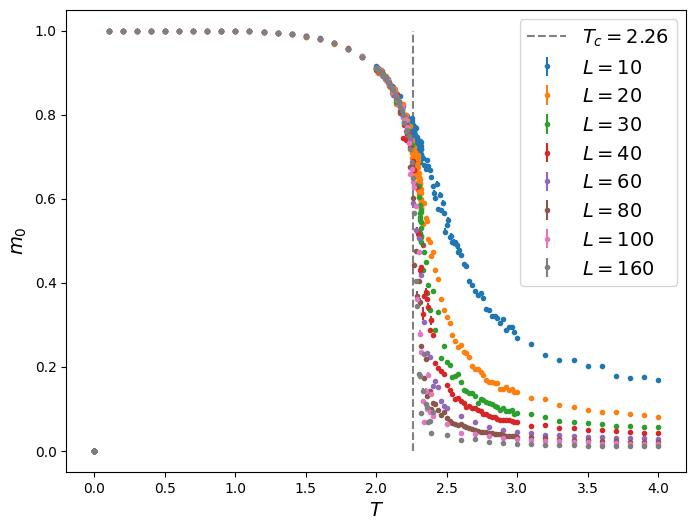

In [127]:
%matplotlib inline
fig, ax = plt.subplots(figsize=(8,6))
ax.set_xlabel(f"$T$", fontsize = 14)
ax.set_ylabel(f"$m_0$", fontsize = 14)

for i, L in enumerate(L_list):
    ax.errorbar(T_array[i,:], rm_array[i,:], error_array[i,:], fmt='.', label=f"$L = {L}$")

Tc = 2.26
ax.vlines(Tc, ymin = np.min(rm_array), ymax = np.max(rm_array), label = f"$T_c = {Tc} $", color='grey', ls='--')

ax.legend(fontsize = 14) 
fig.show();

## Queda pendiente determinar la temperatura crítica

### Diapositiva [51]. Gráfica (a) - COMPLETADO

De aquí obtenemos Tc

In [128]:
U4

array([[ 0.03061929,  0.04742261,  0.08039946, ...,         nan,
                nan,         nan],
       [-0.03848998,  0.06443444,  0.0450018 , ...,         nan,
                nan,         nan],
       [ 0.00039914, -0.02100853,  0.04305572, ...,         nan,
                nan,         nan],
       ...,
       [-0.03551503,  0.02947694,  0.03685494, ...,         nan,
                nan,         nan],
       [ 0.08466367, -0.06834167,  0.10122257, ...,         nan,
                nan,         nan],
       [ 0.05749164,  0.05118443,  0.01890154, ...,         nan,
                nan,         nan]])

C:\Windows\Temp\ipykernel_14140\3144831920.py:3: RuntimeWarning: invalid value encountered in divide
  U4 = 1 - rm4_array / (3*rm2_array**2)


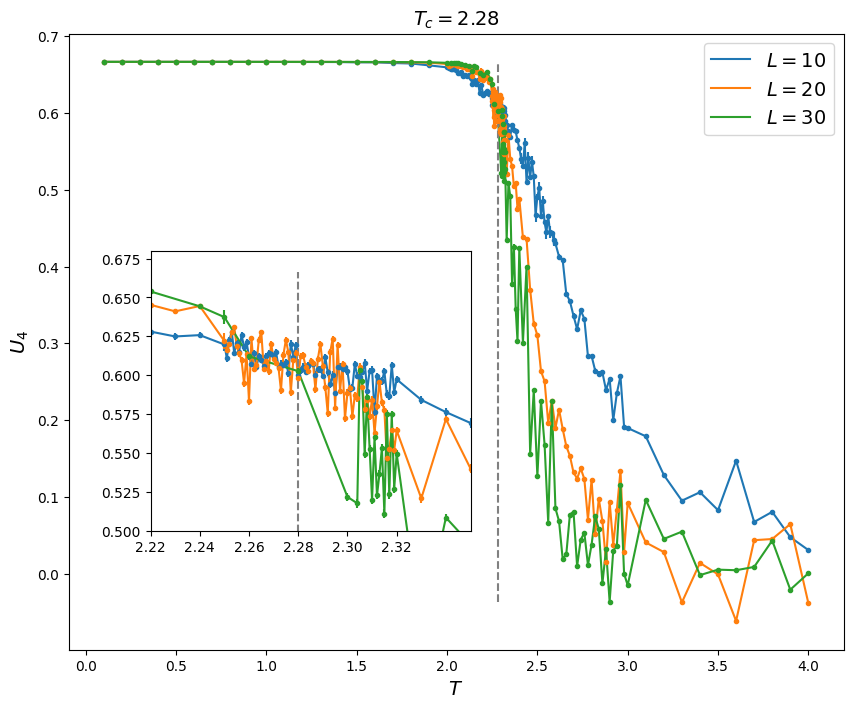

In [130]:
%matplotlib inline
# U_4 = U_4(T,L)
U4 = 1 - rm4_array / (3*rm2_array**2)

fig, ax = plt.subplots(figsize=(10,8))
ax.set_xlabel(f"$T$", fontsize = 14)
ax.set_ylabel(f"$U_4$", fontsize = 14)

# Definir las coordenadas y el tamaño del recuadro del zoom
left, bottom, width, height = [200, 200, 800, 700]

# Crear el gráfico secundario (zoom)
ax_zoom = inset_axes(ax, width='40%', height='40%', loc='lower left', bbox_to_anchor=(left, bottom, width, height), )

for i, L in enumerate(L_list[0:3]):
    
    x = T_array[i, :]
    y = U4[i, :][~np.isnan(U4[i])]

    
    n_colors = len(L_list)
    n_colors = 10
    color = plt.cm.tab10(i / n_colors)
    # p = np.poly1d( np.polyfit(x,y, 3))
    # ax.plot(x, p(x), label=f"$L = {L}$")    
    ax.plot(T_array[i,:], U4[i,:], label=f"$L = {L}$", color = color)
    ax.errorbar(T_array[i,:], U4[i,:], error_array[i,:], fmt='.', color = color)

    ax_zoom.plot(T_array[i,:], U4[i,:], color = color)
    ax_zoom.errorbar(T_array[i,:], U4[i,:], error_array[i,:], fmt='.', color = color)
    

# ax.set_ylim(0.45,0.68)
# ax.set_xlim(2.2,2.32)



global Tc
Tc = 2.28
# Configurar límites para el zoom
ax_zoom.set_xlim(2.23,2.35)
ax_zoom.set_ylim(0.50,0.68)
ax_zoom.vlines(Tc, ymin = np.min(y), ymax = np.max(y), color='grey', ls='--')

ax_zoom.set_xticks(np.arange(2.22, 2.33, 0.02))

ax.set_title(f"$T_c = {Tc}$", fontsize = 14)
ax.vlines(Tc, ymin = np.min(y), ymax = np.max(y), color='grey', ls='--')

ax.legend(fontsize = 14)   
plt.show()

### Diapositiva [51]. Gráfica (b) - COMPLETADO

De aquí obtenemos $\nu$

C:\Windows\Temp\ipykernel_14140\3649131697.py:3: RuntimeWarning: invalid value encountered in divide
  U4 = 1 - rm4_array / (3*rm2_array**2)


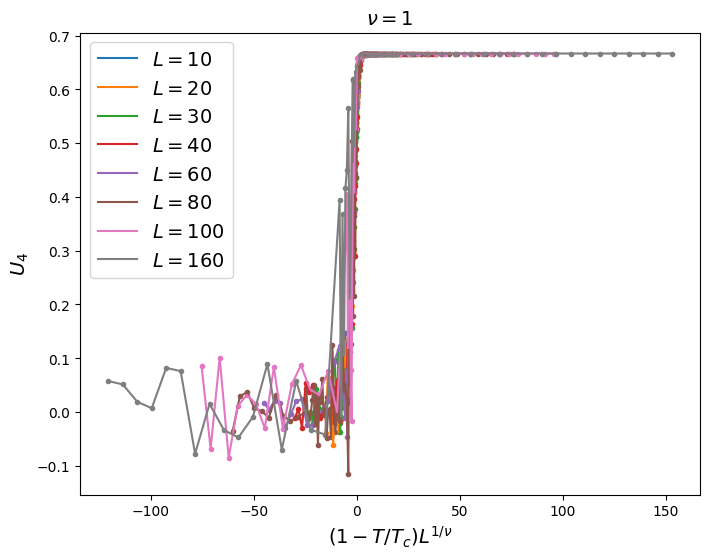

In [113]:
%matplotlib inline
# U_4 = U_4(T,L)
U4 = 1 - rm4_array / (3*rm2_array**2)

fig, ax = plt.subplots(figsize=(8,6))
ax.set_xlabel(r"$(1-T/T_c)L^{1/\nu}$", fontsize = 14)
ax.set_ylabel(f"$U_4$", fontsize = 14)

for i, L in enumerate(L_list):
    nu = 1
    x = (1 - T_array[i] / Tc) * L **(1/nu)
    y = U4[i]
    
 
    ax.plot(x, y, label=f"$L = {L}$")
    ax.scatter(x, y, marker = '.')


#ax.set_xlim(-2.5, 2.5)

ax.set_title(rf"$\nu = {nu}$", fontsize = 14)
ax.legend(fontsize = 14)   
plt.show()

### Ecuación (72)

$ m_0(T) \sim | 1 - T/T_c |^\beta $ $\,\,\,$   para $\,\,\,$  $T \le Tc$

Aplicando logaritmos:


$ \log(m_0(T)) = \beta \log|1-T/T_c| $

$ \beta_{teorico} = 0.125$

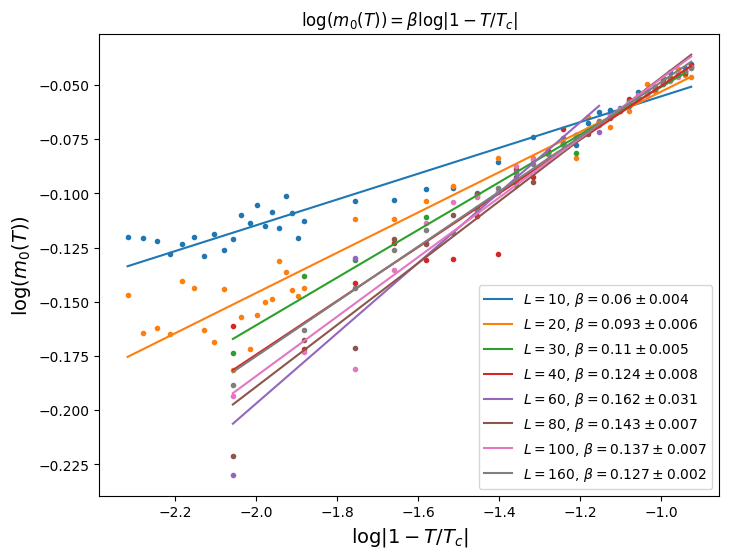

In [114]:
fig, ax = plt.subplots(figsize=(8,6))

Beta = np.zeros(len(L_list))
Beta_error = np.zeros(len(L_list))

for i in range(len(L_list))[0:]:

    # ¡¡¡¡¡¡¡¡¡¡¡¡¡¡ ATENCIÓN !!!!!!!!!!!!!!!!!!
    # ¡¡ESTAMOS DESCARTANDO TAMBIÉN TEMPERATURAS SUPERIORIRES A UN CANTIDAD ARBITRARIA!!!

    idx = np.where((T_array[i] < Tc-0.01) & (T_array[i] > 2.0))[0]
    # plt.loglog()
    x = np.log10(np.abs(1 - T_array[i][idx] / Tc))
    y = np.log10(rm_array[i][idx])
    
    coeff, cov_matrix = np.polyfit(x, y, 1, cov=True)


    Beta_error[i] = np.sqrt(np.diag(cov_matrix))[1]
    Beta[i] = coeff[0]
    p = np.poly1d( coeff )
    ax.plot(x, p(x), label=rf"$L = {L_list[i]}, \, \beta = {round(Beta[i], 3)} \pm {np.abs(round(Beta_error[i], 3))}$")    

    ax.scatter(x, y, marker='.')
    ax.set_xlabel(f"$\log|1-T/T_c|$", fontsize = 14)
    ax.set_ylabel(f"$\log(m_0(T))$", fontsize = 14)
    
    ax.set_title(r"$ \log(m_0(T)) = \beta \log|1-T/T_c| $")

    ax.legend()

### Diapositiva [47]

Comportamiento de la susceptibilidad magnética cerca de la temperatura crítica

In [115]:
k = 1 # Constante de boltzman en nuestro sistema de unidades

C:\Windows\Temp\ipykernel_14140\2584720406.py:7: RuntimeWarning: divide by zero encountered in divide
  y = N/(k*T_array[i]) * (rm2_array[i] - rm_array[i]**2)
C:\Windows\Temp\ipykernel_14140\2584720406.py:7: RuntimeWarning: invalid value encountered in multiply
  y = N/(k*T_array[i]) * (rm2_array[i] - rm_array[i]**2)


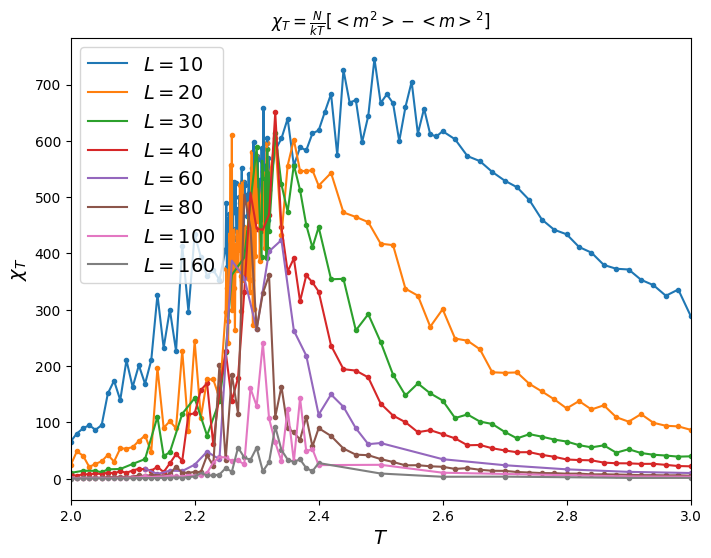

In [116]:
fig, ax = plt.subplots(figsize=(8,6))

for i in range(len(L_list))[:]:

    x = T_array[i]
    N = L*L
    y = N/(k*T_array[i]) * (rm2_array[i] - rm_array[i]**2)

    ax.plot(x, y, label = f"$L={L_list[i]}$")
    ax.scatter(x, y, marker='.')
    ax.set_xlabel(f"$T$", fontsize = 14)
    ax.set_ylabel(f"$\chi_T$", fontsize = 14)
    
    ax.set_title(r"$\chi_T = \frac{N}{kT}[<m^2>-<m>^2]$")
    
    ax.set_xlim(2.0, 3.0)

    ax.legend(fontsize = 14)

### Ecuación (73)

$ \chi_T \sim |1-T/T_c|^{-\gamma}$

Aplicando logaritmos:


$ \log(\chi_T) = -\gamma \log|1-T/T_c| $

$ \gamma_{teorica} = 1.75 $

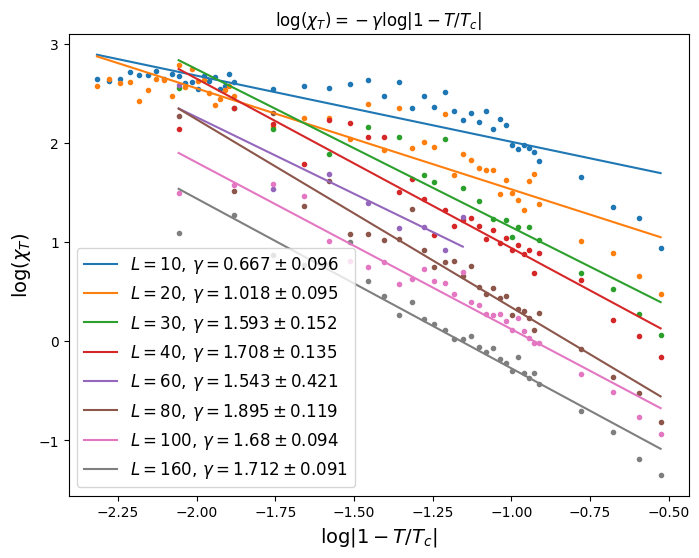

In [117]:

fig, ax = plt.subplots(figsize=(8,6))

Gamma = np.zeros(len(L_list))
Gamma_error = np.zeros(len(L_list))

for i in range(len(L_list))[:]:
    # ¡¡¡¡¡¡¡¡¡¡¡¡¡¡ ATENCIÓN !!!!!!!!!!!!!!!!!!
    # ¡¡ESTAMOS DESCARTANDO TAMBIÉN TEMPERATURAS SUPERIORIRES A UN CANTIDAD ARBITRARIA!!!

    idx = np.where((T_array[i] < Tc-0.01) & (T_array[i] > 1.5))[0]

    x = np.log10(np.abs(1 - T_array[i][idx] / Tc))
    N = L*L
    y = np.log10(N/(k*T_array[i][idx]) * (rm2_array[i][idx] - rm_array[i][idx]**2))
    
    coeff, cov_matrix = np.polyfit(x, y, 1, cov=True)
    Gamma_error[i] = np.sqrt(np.diag(cov_matrix))[1]
    Gamma[i] = -coeff[0]
    p = np.poly1d( coeff )
    ax.plot(x, p(x), label=rf"$L = {L_list[i]}, \, \gamma = {round(Gamma[i], 3)}\pm {np.abs(round(Gamma_error[i], 3))}$")    

    ax.scatter(x, y, marker='.')
    ax.set_xlabel(f"$\log|1-T/T_c|$", fontsize = 14)
    ax.set_ylabel(f"$\log(\chi_T)$", fontsize = 14)
    
    ax.set_title(r"$ \log(\chi_T) = -\gamma \log|1-T/T_c| $")

    ax.legend(fontsize = 12)

### Diapositiva [49]


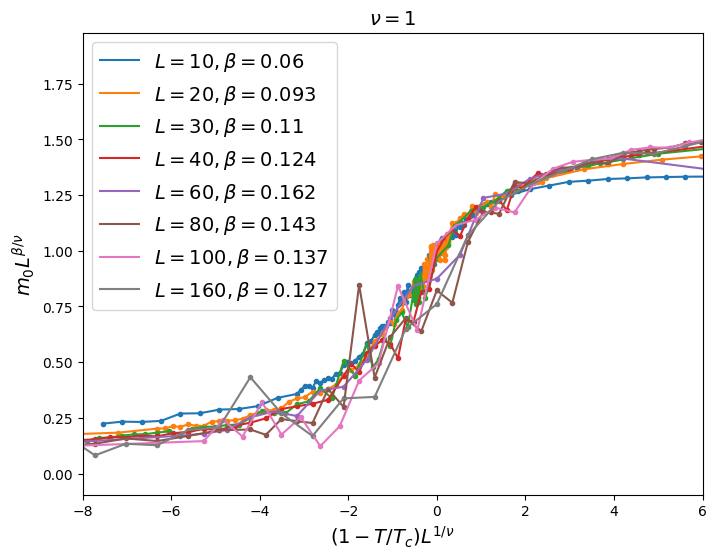

In [118]:
%matplotlib inline

fig, ax = plt.subplots(figsize=(8,6))
ax.set_xlabel(r"$(1-T/T_c)L^{1/\nu}$", fontsize = 14)
ax.set_ylabel(r"$m_0L^{\beta/\nu}$", fontsize = 14)

for i, L in enumerate(L_list):
    nu = 1
    x = (1 - T_array[i] / Tc) * L **(1/nu)
    beta = Beta[-1]
    beta  = 1/8
    y = rm_array[i] * L **(beta/nu)
    
 
    ax.plot(x, y, label=rf"$L = {L}, \beta = {round(Beta[i], 3)}$")
    ax.scatter(x, y, marker = '.')


ax.set_xlim(-8, 6)

ax.set_title(rf"$\nu = {nu}$", fontsize = 14)
ax.legend(fontsize = 14)   
plt.show()

### Diapositiva [50]


C:\Windows\Temp\ipykernel_14140\2042010649.py:12: RuntimeWarning: divide by zero encountered in divide
  chi_T = (N/(k*T_array[i]) * (rm2_array[i] - rm_array[i]**2))
C:\Windows\Temp\ipykernel_14140\2042010649.py:12: RuntimeWarning: invalid value encountered in multiply
  chi_T = (N/(k*T_array[i]) * (rm2_array[i] - rm_array[i]**2))


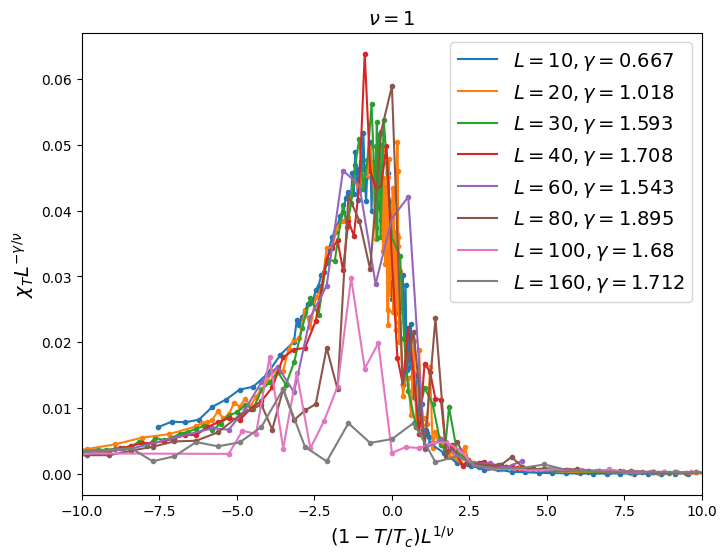

In [119]:
%matplotlib inline

fig, ax = plt.subplots(figsize=(8,6))
ax.set_xlabel(r"$(1-T/T_c)L^{1/\nu}$", fontsize = 14)
ax.set_ylabel(r"$\chi_TL^{-\gamma/\nu}$", fontsize = 14)

for i, L in enumerate(L_list):
    nu = 1
    
    x = (1 - T_array[i] / Tc) * L **(1/nu)
    N = L*L
    chi_T = (N/(k*T_array[i]) * (rm2_array[i] - rm_array[i]**2))
    # gamma = Gamma[-1]
    gamma = 7/4
    y = chi_T * L **(-gamma/nu)
    
 
    ax.plot(x, y, label=rf"$L = {L}, \gamma = {round(Gamma[i], 3)}$")
    ax.scatter(x, y, marker = '.')


ax.set_xlim(-10,10)

ax.set_title(rf"$\nu = {nu}$", fontsize = 14)
ax.legend(fontsize = 14)   
plt.show()